In [1]:
%matplotlib inline
import numpy as np 
import math
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
def sort_vertices(pts):
    xpts = pts[:, 0]
    ypts = pts[:, 1]
    xc = np.sum(xpts) / len(xpts)
    yc = np.sum(ypts) / len(ypts)
    theta = np.arctan2(ypts - yc, xpts - xc) * 180 / np.pi
    indices = np.argsort(theta)
    return pts[indices]

def show_2d(obj):
    plt.figure(figsize=(5, 5))
    if obj is not None:
        sorted_obj = sort_vertices(obj[:, :2])
#         print(sorted_obj)
        plt.fill(sorted_obj[:, 0], sorted_obj[:, 1], fc="blue", ec = "black", alpha=0.5, label="Projected Object")
    plt.legend()
    plt.axis('equal')
    plt.title('Projection')
    plt.show()

def show(obj, newObj=None):
    plt.figure(figsize=(5, 5))
    ax = plt.axes(projection='3d')
    if obj is not None:
        surf = ax.plot_trisurf(obj[:, 0], obj[:, 1], obj[:, 2], alpha = 0.5, label="Original Object")
        surf._facecolors2d=surf._facecolors3d
        surf._edgecolors2d=surf._edgecolors3d
    # print(type(newObj))
    if newObj is not None:
        surf = ax.plot_trisurf(newObj[:, 0], newObj[:, 1], newObj[:, 2], alpha = 0.5, label="Transformed Object")
        surf._facecolors2d=surf._facecolors3d
        surf._edgecolors2d=surf._edgecolors3d
    plt.legend()
    plt.title('3D Transformations')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def getNewObj():
    n = np.random.randint(3, 10) 
    return np.c_[np.random.randint(1, 100, (n, 3)), np.ones((n, 1))]   

def translation(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dx = int(input("Enter translation factor along x-axis: "))
    dy = int(input("Enter translation factor along y-axis: "))
    dz = int(input("Enter translation factor along z-axis: "))
    T = np.eye(4)
    T[3, :-1] = dx, dy, dz
    return obj @ T

def scaling(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dx = int(input("Enter scaling factor along x-axis: "))
    dy = int(input("Enter scaling factor along y-axis: "))
    dz = int(input("Enter scaling factor along z-axis: "))
    T = np.diag((dx, dy, dz, 1.0))
    return obj @ T

def rotation(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    ax = int(input("1.X-axis\n2.Y-axis\n3.Z-axis\nAxis about which to rotate: "))
    if ax not in [1, 2, 3]:
        raise Exception("Enter a valid choice!!")
    dir = int(input("1.Clockwise\n2.Anti-clockwise\nDirection of rotation: ")) 
    if dir not in [1, 2]:
        raise Exception("Enter a valid choice!!")
    deg = int(input("Enter degree of rotation: "))
    if dir == 1:
        deg *= -1
    T = np.eye(4)
    a, b = ax % 3, (ax + 1) % 3
    T[a, a] = T[b, b] = math.cos(math.radians(deg))
    T[a, b] = math.sin(math.radians(deg))
    T[b, a] = -T[a, b]
    return obj @ T

def reflection(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    print("1.Through a plane\n2.About an axis")
    choice = int(input("Enter your choice: "))
    if choice not in [1, 2]:
        raise Exception("Enter a valid choice!!")
    T = np.eye(4)
    if choice == 2:
        T *= -1
        axis = int(input("1.X-axis\n2.Y-axis\n3.Z-axis\nAxis about which to reflect: "))
        if axis not in [1, 2, 3]:
            raise Exception("Enter a valid choice!!")
        T[axis - 1, axis - 1] *= -1
    else:
        plane = int(input("1.XY-plane\n2.YZ-plane\n3.XZ-plane\nPlane through which to reflect: "))
        if plane not in [1, 2, 3]:
            raise Exception("Enter a valid choice!!")
        T[(plane + 1) % 3, (plane + 1) % 3] *= -1
    return obj @ T

def shearing(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dx = list(map(int, input("Enter factors for shearing along x-axis: ").split(' ')))
    if len(dx) != 2:
        raise Exception("Enter two factors, one for each of the other axes")
    dy = list(map(int, input("Enter factors for shearing along y-axis: ").split(' ')))
    if len(dy) != 2:
        raise Exception("Enter two factors, one for each of the other axes")
    dz = list(map(int, input("Enter factors for shearing along z-axis: ").split(' ')))
    if len(dz) != 2:
        raise Exception("Enter two factors, one for each of the other axes")
    T = np.eye(4)
    T[1: 3, 0] = dx
    T[0, 1], T[2, 1] = dy
    T[:2, 2] = dz
    return obj @ T

def projections(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    print("1.Parallel\n2.Perspective")
    choice = int(input("Enter your choice: "))
    if choice not in [1, 2]:
        raise Exception("Enter a valid choice!!")
    print("1.X = 0\n2.Y = 0\n3.Z = 0")
    plane_projection = int(input("Plane of projection: "))
    if plane_projection not in [1, 2, 3]:
        raise Exception("Enter a valid choice!!")
    T = np.eye(4)
    T[plane_projection - 1, plane_projection - 1] = 0
    if choice == 1:      
        print("1.Orthographic\n2.Oblique")
        parallel_choice = int(input("Enter your choice: "))
        if parallel_choice not in [1, 2]:
            raise Exception("Enter a valid choice!!")
        if parallel_choice == 2:
            print("1.Cavalier\n2.Cabinet")
            oblique_type = int(input("Type of oblique projection: "))
            if oblique_type not in [1, 2]:
                raise Exception("Enter a valid choice!!")
            angle = int(input("Horizontal inclination angle(in degrees): "))
            a, b, c = plane_projection - 1, plane_projection % 3, (plane_projection + 1) % 3
            T[a, b] = -math.cos(math.radians(angle))
            T[a, c] = -math.sin(math.radians(angle))
            if oblique_type == 2:
                T[a, b] /= 2
                T[a, c] /= 2
    else:
        print("1.Single-point\n2.Two-point\n3.Three-point")
        perspective_type = int(input("Type of perspective projection: "))
        if perspective_type not in [1, 2, 3]:
            raise Exception("Enter a valid choice!!")
        vec = list(map(int, input("Enter values for the centres of projection at x-, y- and z-axis respectively: ").split()))
#         print(vec)
        if len(vec) != 3:
            raise Exception("Enter exactly three values")
        vec = np.array(vec).astype('float')
        if(len(vec[vec != 0]) != perspective_type):
            raise Exception("Enter number of non-zero centres according to your chosen perspective type")
        vec[vec != 0] = -1. / vec[vec != 0]
#         print(vec)
        T[:-1, -1] = vec
    print('Transformation Matrix')
    print(T)
    res = obj @ T
    res /= res[:, -1:]
    return res[:, ~np.all(res == 0, axis = 0)]



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 1
Coordinates of the object
(10.0, 47.0, 93.0)
(43.0, 11.0, 33.0)
(95.0, 70.0, 35.0)
(76.0, 10.0, 51.0)
(22.0, 94.0, 95.0)
(43.0, 18.0, 63.0)
(41.0, 16.0, 90.0)


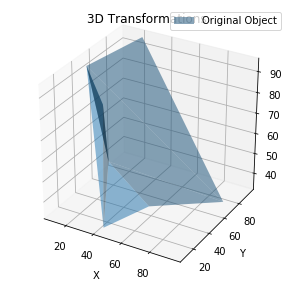



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 2
Enter translation factor along x-axis: 10
Enter translation factor along y-axis: 5
Enter translation factor along z-axis: 5


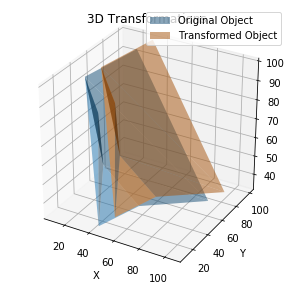



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 3
Enter scaling factor along x-axis: 2
Enter scaling factor along y-axis: 2
Enter scaling factor along z-axis: 3


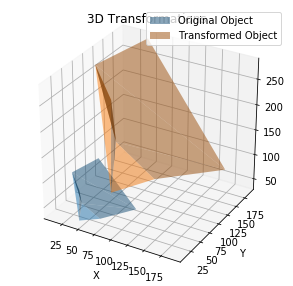



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 4
1.X-axis
2.Y-axis
3.Z-axis
Axis about which to rotate: 1
1.Clockwise
2.Anti-clockwise
Direction of rotation: 1
Enter degree of rotation: 90


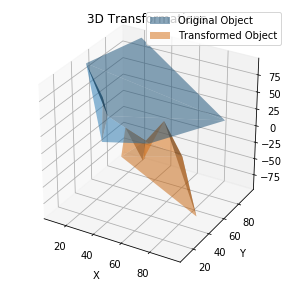



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 5
1.Through a plane
2.About an axis
Enter your choice: 2
1.X-axis
2.Y-axis
3.Z-axis
Axis about which to reflect: 1


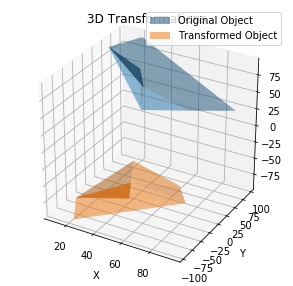



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 7
1.Parallel
2.Perspective
Enter your choice: 1
1.X = 0
2.Y = 0
3.Z = 0
Plane of projection: 3
1.Orthographic
2.Oblique
Enter your choice: 1
Transformation Matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


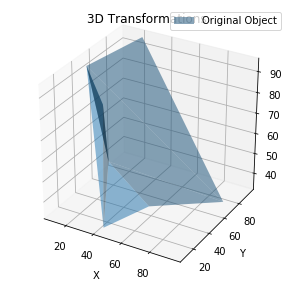

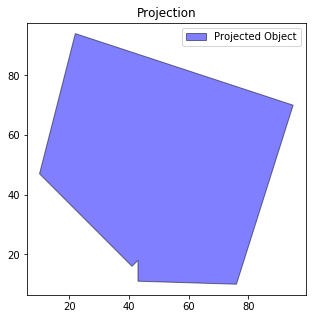



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 7
1.Parallel
2.Perspective
Enter your choice: 1
1.X = 0
2.Y = 0
3.Z = 0
Plane of projection: 3
1.Orthographic
2.Oblique
Enter your choice: 2
1.Cavalier
2.Cabinet
Type of oblique projection: 2
Horizontal inclination angle(in degrees): 30
Transformation Matrix
[[ 1.         0.         0.         0.       ]
 [ 0.         1.         0.         0.       ]
 [-0.4330127 -0.25       0.         0.       ]
 [ 0.         0.         0.         1.       ]]


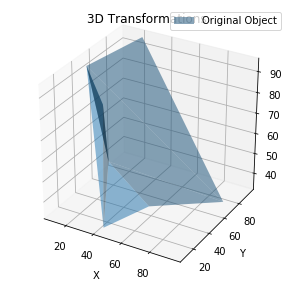

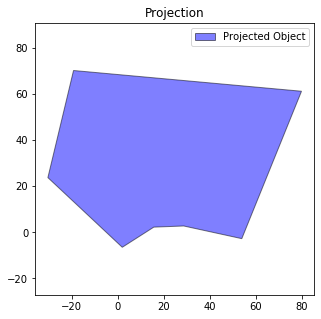



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 7
1.Parallel
2.Perspective
Enter your choice: 2
1.X = 0
2.Y = 0
3.Z = 0
Plane of projection: 3
1.Single-point
2.Two-point
3.Three-point
Type of perspective projection: 3
Enter values for the centres of projection at x-, y- and z-axis respectively: 100 100 100
Transformation Matrix
[[ 1.    0.    0.   -0.01]
 [ 0.    1.    0.   -0.01]
 [ 0.    0.    0.   -0.01]
 [ 0.    0.    0.    1.  ]]


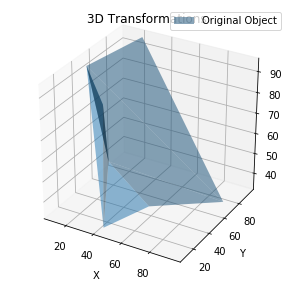

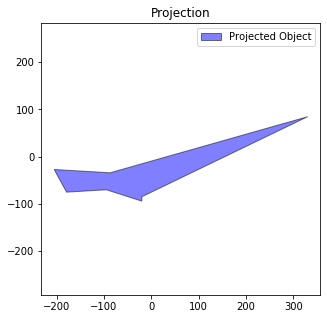



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
7.Project Object
0.Exit
Enter your choice: 0


In [3]:
obj = None
while True:
    try:
        print("\n\n----------Menu----------")
        print("1.Create new Object")
        print("2.Translate Object")
        print("3.Scale Object")
        print("4.Rotate Object")
        print("5.Reflect Object")
        print("6.Shear Object")
        print("7.Project Object")
        print("0.Exit")
        choice = input("Enter your choice: ")
        if choice == '0':
            break
        elif choice == '1':
            obj = getNewObj()
            print("Coordinates of the object")
            print("\n".join(list(map(str, list(zip(obj[:, 0], obj[:, 1], obj[:, 2]))))))
            show(obj)
        elif choice == '2':
            newObj = translation(obj)
            show(obj, newObj)
        elif choice == '3':
            newObj = scaling(obj)
            show(obj, newObj)
        elif choice == '4':
            newObj = rotation(obj)
            show(obj, newObj)
        elif choice == '5':
            newObj = reflection(obj)
            show(obj, newObj)
        elif choice == '6':
            newObj = shearing(obj)
            show(obj, newObj)
        elif choice == '7':
            newObj = projections(obj)
#             print(newObj)
            show(obj)
            show_2d(newObj)
        else:
            raise Exception("Enter a valid choice!!")

    except Exception as e:
        print(e)